In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [ ]:

#import csv
mouse_data = '/Users/anthonygarcia/Desktop/Mouse_metadata.csv'
study_results = '/Users/anthonygarcia/Desktop/Study_results.csv'

#read csv
data_mouse = pd.read_csv(mouse_data)
results_study = pd.read_csv(study_results)

#merge csv
mouse_study = pd.merge(data_mouse, results_study, how="left", on=["Mouse ID", "Mouse ID"])
mouse_study



In [44]:
#Get the unique values of mice
mice_count = mouse_study['Mouse ID'].nunique()
mice_count

249

In [45]:
#list of duplicates
duplicates = pd.concat(m for _, m in mouse_study.groupby(["Mouse ID","Timepoint"]) if len(m) > 1)
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
#cleaned DF with dropped duplicates
drop_dup = mouse_study.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)

#shows all rows/columns
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(drop_dup)



In [47]:
new_count = drop_dup['Mouse ID'].nunique()
new_count

249

In [48]:
#summary statistics and new dataframe
clean_data = drop_dup.groupby("Drug Regimen")
mean = drop_dup.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
median = drop_dup.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
var = drop_dup.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()
std_dev = drop_dup.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
sem = drop_dup.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()


new_df = pd.DataFrame({'Mean': mean, 'Median': median, "Variance": var, "Standard Deviation": std_dev, "SEM": sem})

stat_summary = drop_dup.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
stat_summary



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
drug_name = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
y = drop_dup.groupby('Drug Regimen')
mice_regimen = drop_dup.groupby('Drug Regimen')['Timepoint'].sum()



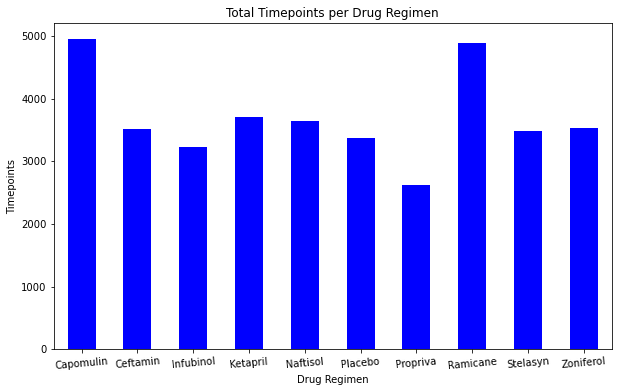

In [50]:
pandas_plot = mice_regimen.plot(kind='bar', title='Total Timepoints per Drug Regimen',
               ylabel='Timepoints', xlabel='Drug Regimen',color='blue', figsize=(10, 6), rot=5)



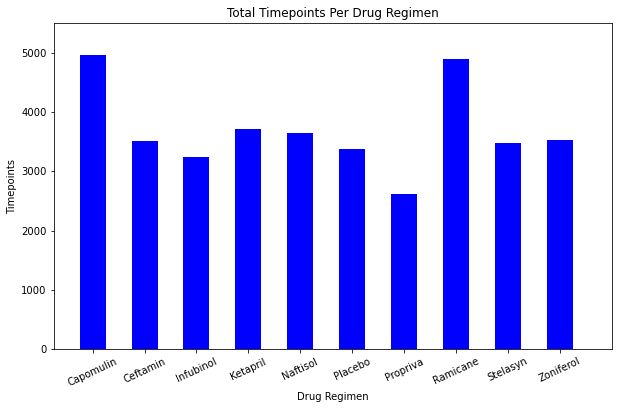

In [66]:
drug_name = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
x_axis = np.arange(len(mice_regimen))
tick_location = [x for x in x_axis]

resize = plt.figure(figsize=(10,6))
plt_bar = plt.bar(x_axis, mice_regimen, color='blue', align='center', width=0.50)
ticks = plt.xticks(tick_location,drug_name, rotation=25)

plt.xlim(-.75,10)
plt.ylim(0,5500)
plt.title("Total Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()

In [52]:
gender_count = drop_dup.value_counts('Sex')
gender_count



Sex
Male      958
Female    925
dtype: int64

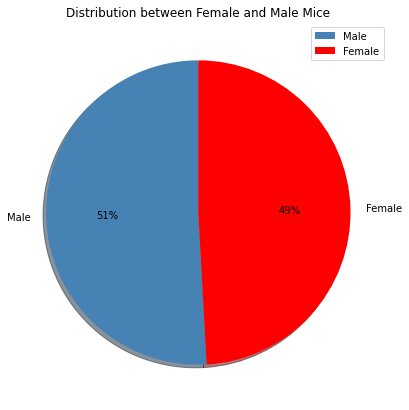

In [53]:
#pie graph using pandas
gender_plot = gender_count.plot.pie(y='Sex',autopct='%1.0f%%',colors=['steelblue','red'],title='Distribution between Female and Male Mice',shadow=True,startangle=90,legend=True, figsize=(7,7))
gender_plot.set_ylabel(None)
plt.show()

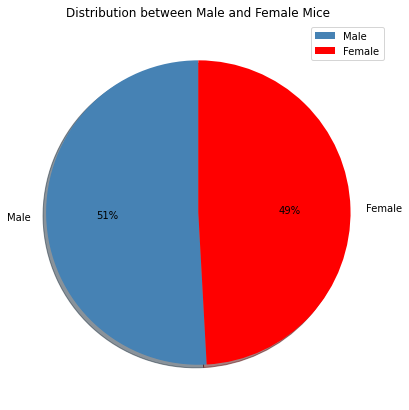

In [54]:
#pie graph using PyPlot
plt.pie(gender_count, labels=['Male','Female'], startangle=90, shadow=True, colors=['steelblue','red'],autopct='%1.0f%%')
plt.title('Distribution between Male and Female Mice', loc= 'center')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(7,7)



In [ ]:
#filter data through 4 of the treatment regimens
final_tum_vol = drop_dup[drop_dup['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
final_tum_vol

In [ ]:
# Get the greatest timepoint for each mouse and merge data
max_time = final_tum_vol.groupby(['Mouse ID','Drug Regimen']).max('Timepoint').reset_index()

merge_data = max_time[['Mouse ID', 'Timepoint']].merge(drop_dup, on = ['Mouse ID', 'Timepoint'], how = 'left')
merge_data

In [57]:
capo = merge_data.loc[merge_data['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
quantiles = capo.quantile([.25,.5,.75])
lower = quantiles[.25]
upper = quantiles[.75]
iqr = upper - lower
lower_bound = lower-(1.5*iqr)
upper_bound = upper+(1.5*iqr)
outlier = capo.loc[(capo < lower_bound) | (capo > upper_bound)]
outlier

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [58]:
ram = merge_data.loc[merge_data['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
quant = ram.quantile([.25,.5,.75])
lower_ = quantiles[.25]
upper_ = quantiles[.75]
iqr_ = upper_ - lower_
l_bound = lower_-(1.5*iqr)
u_bound = upper_+(1.5*iqr)
out_lier = ram.loc[(ram < l_bound) | (ram > u_bound)]
out_lier

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [59]:
infub = merge_data.loc[merge_data['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
q = infub.quantile([.25,.5,.75])
q1 = q[.25]
q3 = q[.75]
i_qr = q3 - q1
low_bound = q1-(1.5*i_qr)
up_bound = q3+(1.5*i_qr)
out = infub.loc[(infub < low_bound) | (infub > up_bound)]
out

15    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [60]:
ceft = merge_data.loc[merge_data['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']
quan = ceft.quantile([.25,.5,.75])
low = quan[.25]
up = quan[.75]
iq_r = up - low
lo_bound = low-(1.5*iq_r)
upp_bound = up+(1.5*iq_r)
outlier = ceft.loc[(ceft < lo_bound) | (ceft > upp_bound)]
outlier

Series([], Name: Tumor Volume (mm3), dtype: float64)

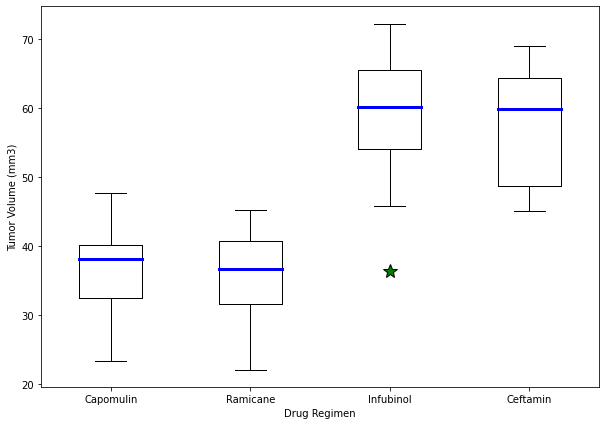

In [61]:
#create a boxplot

labels = ['Capomulin','Ramicane','Infubinol','Ceftamin']
quartiles = [capo,ram,infub,ceft]

medianpoints = dict(linestyle='-', linewidth=3, color='blue')
flierprops = dict(marker='*',markerfacecolor='green',markersize=15)
plt.boxplot(quartiles,labels=labels,flierprops=flierprops, medianprops=medianpoints)

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

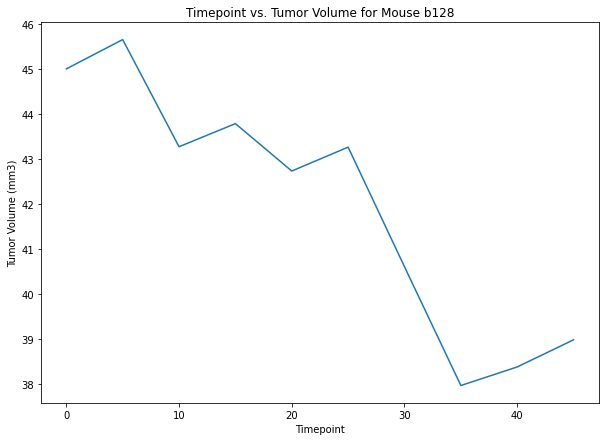

In [62]:
#lineplot
mouse = drop_dup.loc[drop_dup['Mouse ID'].isin(['b128'])]

x = mouse['Timepoint']
y=mouse['Tumor Volume (mm3)']

plt.plot(x,y)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Timepoint vs. Tumor Volume for Mouse b128')
fig = plt.gcf()
fig.set_size_inches(10,7)

plt.show()



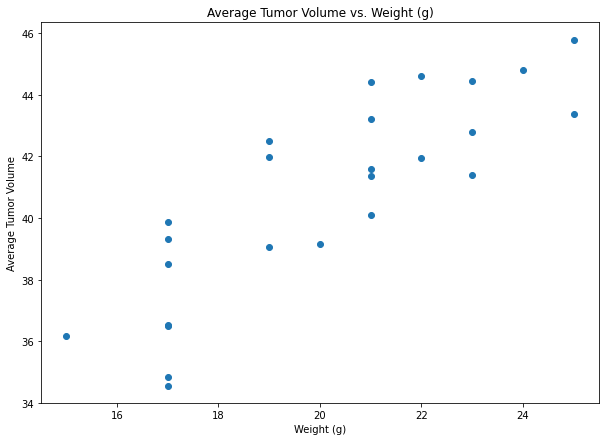

In [63]:
#Create scatter plot of avg tumor volume vs weight

capomulin_data = drop_dup[drop_dup['Drug Regimen'].isin(['Capomulin'])]

avg_tumor = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
m_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

x= m_weight
y= avg_tumor

plt.scatter(x,y)


plt.title("Average Tumor Volume vs. Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
fig = plt.gcf()
fig.set_size_inches(10,7)

plt.show()


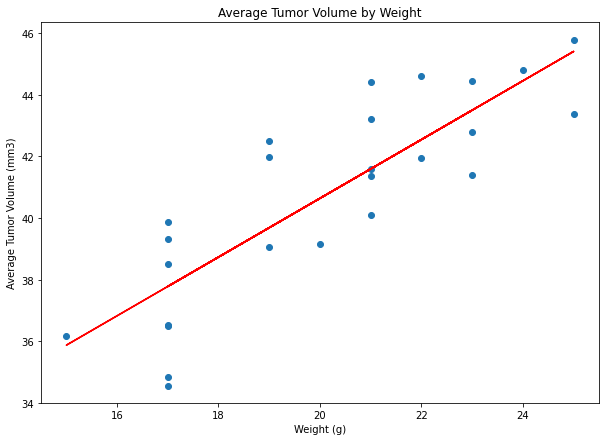

In [64]:
from sklearn.linear_model import LinearRegression

#calculate the correlation and linear regression
capomulin_data = drop_dup[drop_dup['Drug Regimen'].isin(['Capomulin'])]

avg_tumor = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
m_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

x= m_weight
y= avg_tumor

correlation = x.corr(y)

x_val = m_weight.values.reshape(-1,1)
y_val = avg_tumor.values.reshape(-1,1)

l_regress = LinearRegression()
l_regress.fit(x_val,y_val)
y_pred = l_regress.predict(x_val)

plt.scatter(x_val,y_val)
plt.plot(x,y_pred, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()